In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import plotly.express as px
import matplotlib.ticker as ticker
%matplotlib inline

sns.set_style('darkgrid')

In [43]:
data = pd.read_csv("data/Ecommerce_Customer_Behavior.csv")
df = data.copy()

In [44]:
df.head()

,Customer ID,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level
0,101,Female,29,New York,Gold,1120.20,14,4.6,True,25,Satisfied
1,102,Male,34,Los Angeles,Silver,780.50,11,4.1,False,18,Neutral
2,103,Female,43,Chicago,Bronze,510.75,9,3.4,True,42,Unsatisfied
3,104,Male,30,San Francisco,Gold,1480.30,19,4.7,False,12,Satisfied
4,105,Male,27,Miami,Silver,720.40,13,4.0,True,55,Unsatisfied


In [45]:
df.shape

(350, 11)

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               350 non-null    int64  
 1   Gender                    350 non-null    object 
 2   Age                       350 non-null    int64  
 3   City                      350 non-null    object 
 4   Membership Type           350 non-null    object 
 5   Total Spend               350 non-null    float64
 6   Items Purchased           350 non-null    int64  
 7   Average Rating            350 non-null    float64
 8   Discount Applied          350 non-null    bool   
 9   Days Since Last Purchase  350 non-null    int64  
 10  Satisfaction Level        348 non-null    object 
dtypes: bool(1), float64(2), int64(4), object(4)
memory usage: 27.8+ KB


In [47]:
df.head()

,Customer ID,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level
0,101,Female,29,New York,Gold,1120.20,14,4.6,True,25,Satisfied
1,102,Male,34,Los Angeles,Silver,780.50,11,4.1,False,18,Neutral
2,103,Female,43,Chicago,Bronze,510.75,9,3.4,True,42,Unsatisfied
3,104,Male,30,San Francisco,Gold,1480.30,19,4.7,False,12,Satisfied
4,105,Male,27,Miami,Silver,720.40,13,4.0,True,55,Unsatisfied


In [48]:
df.Gender.unique()

array(['Female', 'Male'], dtype=object)

In [49]:
df.City.unique()

array(['New York', 'Los Angeles', 'Chicago', 'San Francisco', 'Miami',
       'Houston'], dtype=object)

In [50]:
df["Satisfaction Level"].unique()

array(['Satisfied', 'Neutral', 'Unsatisfied', nan], dtype=object)

In [51]:
df[df['Satisfaction Level'].isnull()]

,Customer ID,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level
71,172,Female,37,Houston,Bronze,420.8,7,3.1,False,21,NaN
143,244,Female,37,Houston,Bronze,430.8,7,3.4,False,23,NaN


In [52]:
df['Satisfaction Level'].value_counts()

Satisfaction Level
Satisfied      125
Unsatisfied    116
Neutral        107
Name: count, dtype: int64

In [53]:
df['Satisfaction Level'].fillna("N/A", inplace=True)

C:\Users\dlami\AppData\Local\Temp\ipykernel_1432\1000656797.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Satisfaction Level'].fillna("N/A", inplace=True)


In [54]:
df['Satisfaction Level'].isnull().any()

np.False_

In [55]:
df.describe()

,Customer ID,Age,Total Spend,Items Purchased,Average Rating,Days Since Last Purchase
count,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000
mean,275.500000,33.597143,845.381714,12.600000,4.019143,26.588571
std,101.180532,4.870882,362.058695,4.155984,0.580539,13.440813
min,101.000000,26.000000,410.800000,7.000000,3.000000,9.000000
25%,188.250000,30.000000,502.000000,9.000000,3.500000,15.000000
50%,275.500000,32.500000,775.200000,12.000000,4.100000,23.000000
75%,362.750000,37.000000,1160.600000,15.000000,4.500000,38.000000
max,450.000000,43.000000,1520.100000,21.000000,4.900000,63.000000


In [56]:
df.head(2)

,Customer ID,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level
0,101,Female,29,New York,Gold,1120.2,14,4.6,True,25,Satisfied
1,102,Male,34,Los Angeles,Silver,780.5,11,4.1,False,18,Neutral


In [57]:
mts = df.groupby("Membership Type")['Total Spend'].sum().sort_values(ascending=False).reset_index()
dslbg = df.groupby(["Gender", "Satisfaction Level"]).size().unstack()
ave_member = df.groupby("Membership Type")["Items Purchased"].mean().sort_values(ascending=False).reset_index()
high_city = df.groupby("City")['Average Rating'].mean().sort_values(ascending=False).reset_index()

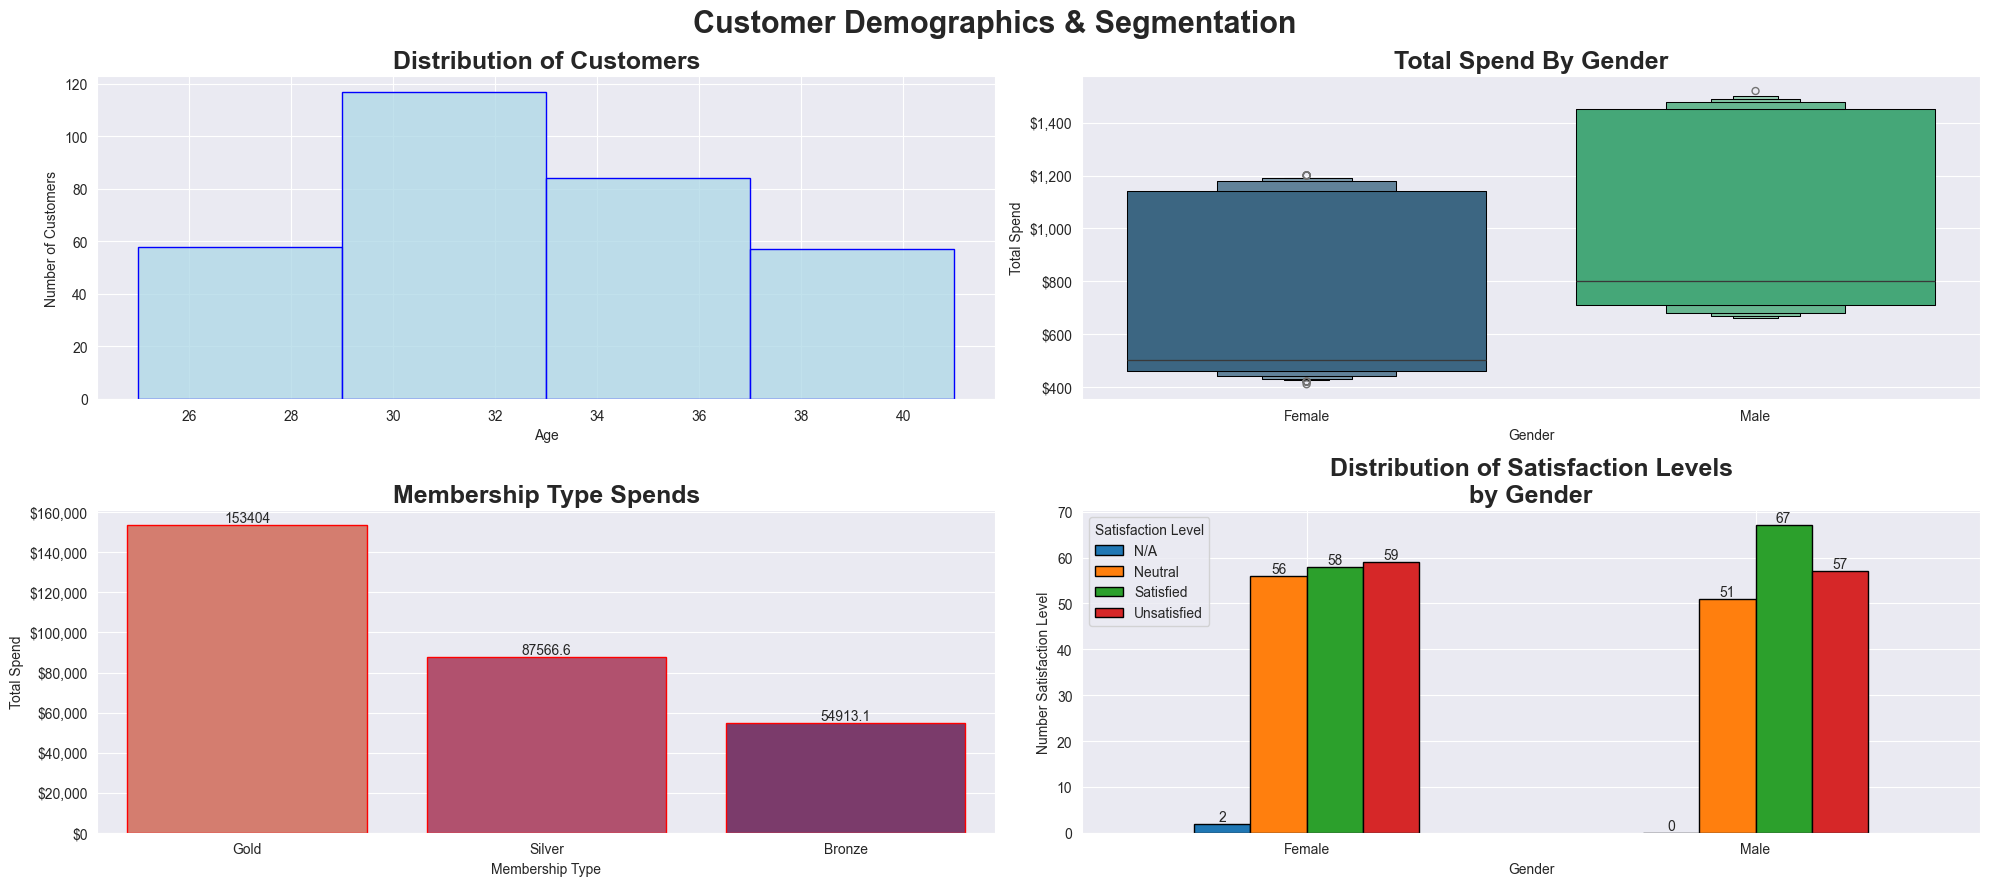

In [58]:
# Customer Demographics & Segmentation

fig, axis = plt.subplots(2, 2, figsize=(20, 9))

# --------------------------------Distribution of Customers-------------------------------------------------
sns.histplot(data=df, x='Age', ax=axis[0, 0], bins=np.arange(25, 45, 4), color='lightblue', edgecolor='blue') # Age between 26-43
axis[0, 0].set_title('Distribution of Customers', fontweight='bold', fontsize=18)
axis[0, 0].set_ylabel("Number of Customers")

# ---------------------------------Total Spend By Gender----------------------------------------------------
sns.boxenplot(data=df, x='Gender', y="Total Spend", ax=axis[0, 1], hue='Gender', palette='viridis', edgecolor='black')
axis[0, 1].set_title("Total Spend By Gender", fontweight='bold', fontsize=18)
axis[0, 1].yaxis.set_major_formatter(ticker.StrMethodFormatter("${x:,.0f}"))

# -------------------------------Membership Type Spends------------------------------------------------------
sns.barplot(data=mts, x="Membership Type", y="Total Spend", ax=axis[1, 0], hue="Membership Type", palette='flare', edgecolor='red')
axis[1, 0].set_title("Membership Type Spends", fontweight='bold', fontsize=18)
axis[1, 0].yaxis.set_major_formatter(ticker.StrMethodFormatter("${x:,.0f}"))

for index in range(len(mts)):
    axis[1, 0].bar_label(axis[1, 0].containers[index])

# ----------------------Distribution of Satisfaction Levels by Gender----------------------------------------
dslbg.plot(kind="bar", ax=axis[1, 1], edgecolor='black')
axis[1, 1].tick_params(axis='x', rotation=0)
axis[1, 1].set_title("Distribution of Satisfaction Levels\nby Gender", fontweight='bold', fontsize=18)
axis[1, 1].set_ylabel("Number Satisfaction Level")

for index in range(len(dslbg)+10):
    try:
        axis[1, 1].bar_label(axis[1, 1].containers[index])
    except:
        pass


fig.suptitle("Customer Demographics & Segmentation", fontweight='bold', fontsize=22)
fig.tight_layout()


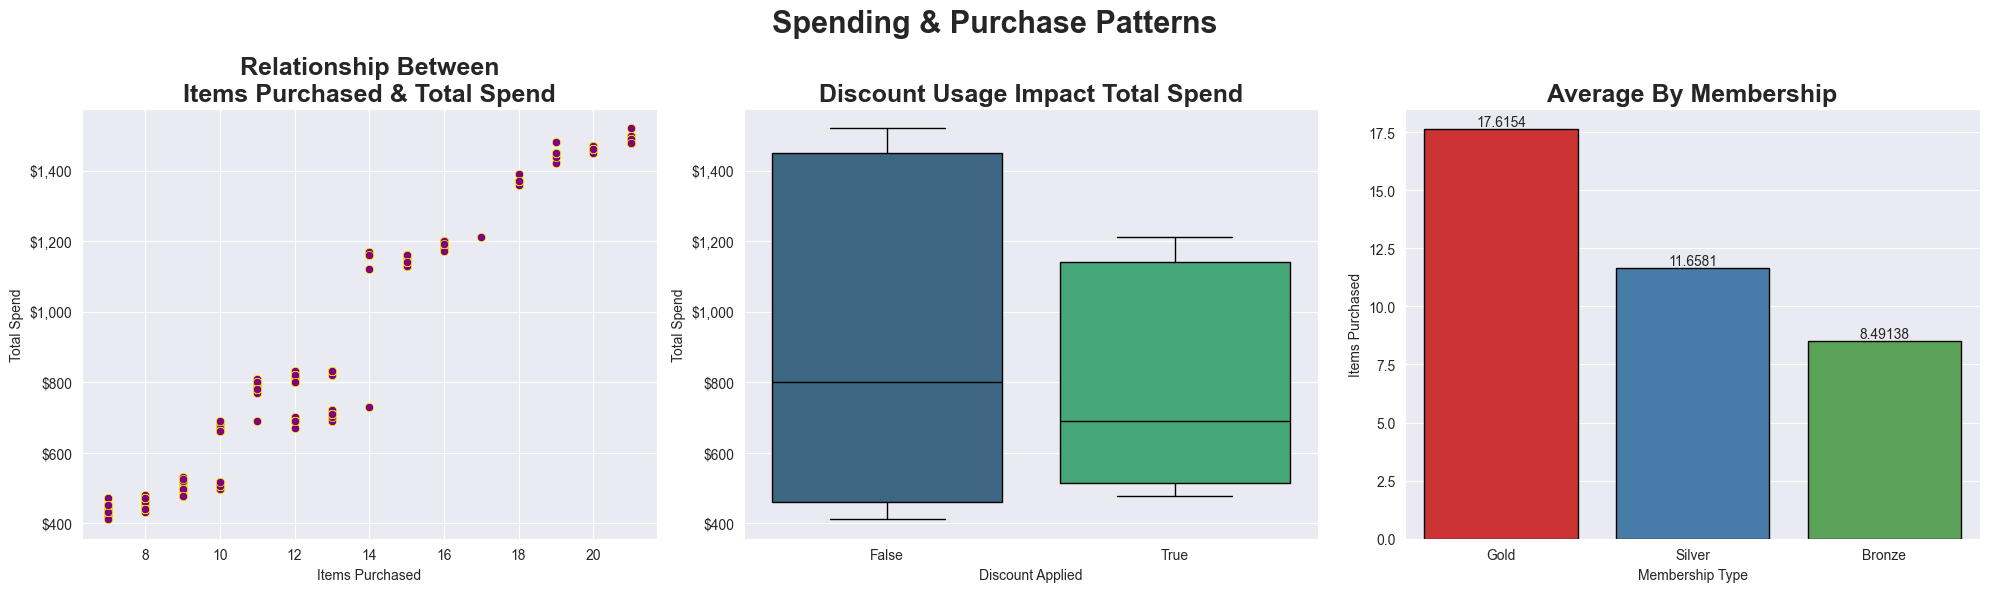

In [59]:
# Spending & Purchase Patterns

fig, axis = plt.subplots(1, 3, figsize=(20, 6))

# ------------------------Relationship Between Items Purchased & Total Spend----------------------------------
sns.scatterplot(data=df, x="Items Purchased", y="Total Spend", ax=axis[0], color="purple", edgecolor='yellow')
axis[0].set_title("Relationship Between\nItems Purchased & Total Spend", fontweight='bold', fontsize=18)
axis[0].yaxis.set_major_formatter(ticker.StrMethodFormatter("${x:,.0f}"))

# --------------------------------Discount Usage Impact Total Spend------------------------------------------
sns.boxplot(data=df, x='Discount Applied', y="Total Spend", ax=axis[1], hue='Discount Applied', palette='viridis', legend=False, linecolor='black')
axis[1].set_title("Discount Usage Impact Total Spend", fontweight='bold', fontsize=18)
axis[1].yaxis.set_major_formatter(ticker.StrMethodFormatter("${x:,.0f}"))

# --------------------------------------Average by Membership-----------------------------------------------
sns.barplot(data=ave_member, x="Membership Type", y='Items Purchased', ax=axis[2], hue="Membership Type", palette='Set1', edgecolor='black')
axis[2].set_title("Average By Membership", fontweight='bold', fontsize=18)

for index in range(len(ave_member)):
    axis[2].bar_label(axis[2].containers[index])

fig.suptitle("Spending & Purchase Patterns", fontweight='bold', fontsize=22)
fig.tight_layout()

plt.show()

In [60]:
df.head(2)

,Customer ID,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level
0,101,Female,29,New York,Gold,1120.2,14,4.6,True,25,Satisfied
1,102,Male,34,Los Angeles,Silver,780.5,11,4.1,False,18,Neutral


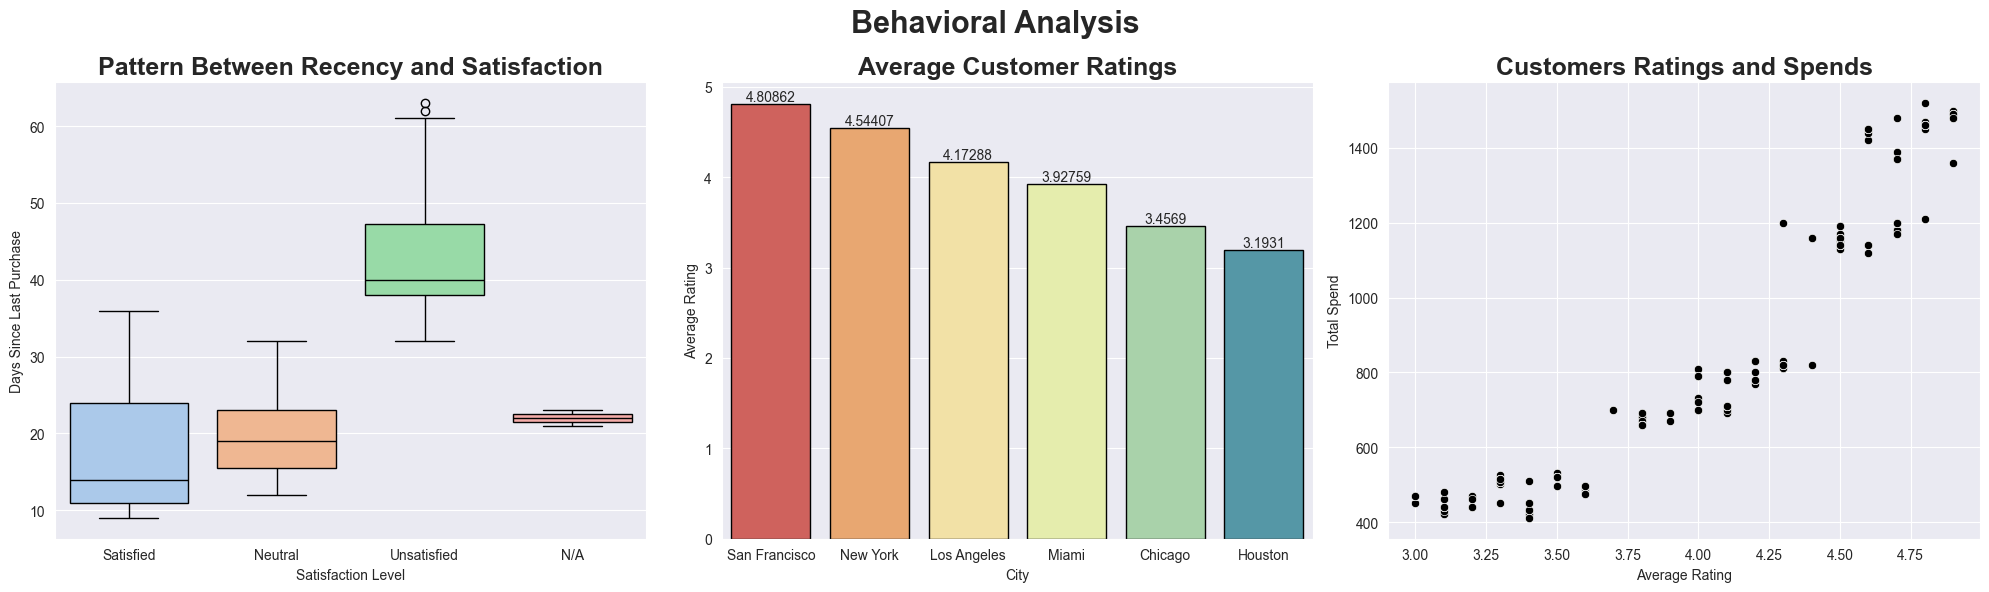

In [ ]:
# Behavioral Analysis

fig, axis = plt.subplots(1, 3, figsize=(20, 6))

# ------------------------------Pattern Between Recency and Satisfaction-----------------------
sns.boxplot(data=df, x='Satisfaction Level', y='Days Since Last Purchase', ax=axis[0], hue="Satisfaction Level", palette="pastel", linecolor='black')
axis[0].set_title("Pattern Between Recency and Satisfaction", fontweight='bold', fontsize=18)

# ----------------------------------Average Customer Ratings-----------------------------------
sns.barplot(data=high_city, x="City", y="Average Rating", ax=axis[1], hue='City', palette='Spectral', edgecolor='black')
axis[1].set_title("Average Customer Ratings", fontweight='bold', fontsize=18)

for index in range(len(high_city)):
    axis[1].bar_label(axis[1].containers[index])

# --------------------------------Customers Ratings and Spends---------------------------------
sns.scatterplot(data=df, x='Average Rating', y='Total Spend', ax=axis[2], color='black')
axis[2].set_title("Customers Ratings and Spends", fontweight='bold', fontsize=18)


fig.suptitle("Behavioral Analysis", fontweight='bold', fontsize=22)
fig.tight_layout()

# E-commerce Customer Behavior Analysis Report

## Summary Insights

In analyzing customer behavior from our e-commerce platform, a few clear patterns emerged. Our core demographic is clustered between the ages of **29 to 37**, with **males** consistently outspending females. Interestingly, **Gold members** not only spend the most but also purchase the highest average number of items.

The number of **items purchased is a strong driver of total spending**—more items typically mean higher total spend. Discounts do influence spending patterns slightly, though not drastically. 

On the satisfaction front, **satisfied customers tend to return more quickly**, whereas unsatisfied customers take much longer to come back. This highlights the importance of maintaining customer satisfaction to encourage repeat business. City-wise, **San Francisco tops the charts for customer ratings**, and there’s a strong correlation between higher customer ratings and increased spending.

All these behavioral signals provide a roadmap for improving customer targeting, retention, and revenue optimization.

---

## Full Insights

### Customer Demographics & Segmentation

- **Customer Age Distribution**
  - Most customers fall between **29 to 33 years**, with **over 110 customers**.
  - Followed by those aged **33 to 37**, with **over 80 customers**.
  - Customers aged **25 to 29** and **37 to 50** both have **fewer than 60** customers.

- **Total Spend by Gender**
  - **Males spend more** than females.
    - **Male spend stats**:
      - Mean: **$800–$900**
      - Q1: **$700–$800**
      - Q3: **Above $1,400**
    - **Female spend stats**:
      - Mean: **$500–$600**
      - Q1: **$400–$500**
      - Q3: **$1,100–$1,200**

- **Spend by Membership Type**
  - **Gold**: $153,404
  - **Silver**: $87,566
  - **Bronze**: $54,913

- **Satisfaction Levels by Gender**
  - **Female**:
    - N/A: 2
    - Neutral: 56
    - Satisfied: 58
    - Unsatisfied: 59
  - **Male**:
    - N/A: 0
    - Neutral: 51
    - Satisfied: 67
    - Unsatisfied: 57

---

### Spending & Purchase Patterns

- **Items Purchased vs. Total Spend**
  - 0–10 items: $400–$600
  - 10–14 items: $600–$900
  - 14–17 items: $1,100–$1,300
  - 18–21 items: $1,300–$1,600
  - **Insight**: Higher item count → Higher total spend

- **Impact of Discounts on Total Spend**
  - **Without Discount**:
    - Mean: $800
    - Q1: $400–$450
    - Q3: Over $1,500
  - **With Discount**:
    - Mean: $700
    - Q1: $450–$500
    - Q3: $1,200–$1,250

- **Average Items Purchased by Membership Type**
  - **Gold**: 17.6 items
  - **Silver**: 11.6 items
  - **Bronze**: 8.5 items

---

### Behavioral Analysis

- **Recency and Satisfaction Relationship**
  - **Unsatisfied customers** take the longest to return: **~40 days**
  - **N/A (only females)**: 20–25 days
  - **Neutral**: 15–20 days
  - **Satisfied**: 10–15 days

- **Average Customer Ratings by City**
  - **San Francisco**: 4.8 
  - **New York**: 4.5 
  - **Los Angeles**: 4.2 
  - **Miami**: 3.9 
  - **Chicago**: 3.4 
  - **Houston**: 3.1 

- **Customer Rating vs. Total Spend**
  - Ratings **3.0–3.6**: Spend $400–$600
  - Ratings **3.7–4.4**: Spend $600–$900
  - Ratings **4.3–4.8**: Spend $1,100–$1,250
  - Ratings **4.6–4.8**: Spend over $1,300

---

## Key Takeaways

- **Target Ages**: 29–37 is the most active spending age group.
- **Males outspend females**, especially in the higher spending quartiles.
- **Gold Members are your MVPs**: highest spend and most items purchased.
- **Number of items purchased directly drives spending**.
- **Discounts reduce average spending**, but not drastically.
- **Satisfied customers return sooner** — loyalty matters.
- **San Francisco customers are happiest** and spend the most.
- **Higher ratings = Higher spending**. Quality service pays.

---

